<a href="https://colab.research.google.com/github/Kateriiina/Lesson/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

def preprocess_data():
    """
    Preprocesses the diamond dataset by mapping categorical variables to numerical values.

    Returns:
    - pandas.DataFrame:
        The preprocessed dataset with mapped categorical variables.
    """

       # Fetching the diamond dataset
    df = fetch_openml(data_id=42225, as_frame=True).frame

    # Separating the target variable 'price' from the dataset
    df_target = df['price']
    df_data = df.drop(['price'], axis=1)

    # Mapping the categorical variables to numerical values
    cut_mapping = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
    color_mapping = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}
    clarity_mapping = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}

    df_data['cut'] = df_data['cut'].map(cut_mapping)
    df_data['color'] = df_data['color'].map(color_mapping)
    df_data['clarity'] = df_data['clarity'].map(clarity_mapping)

    return df_data, df_target, df_data.columns, df_data.shape[1]

# Preprocess the data
features, targets, columns, shape = preprocess_data()


# Print the preprocessed data
print(features)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


       carat cut color clarity  depth  table     x     y     z
0       0.23   5     6       2   61.5   55.0  3.95  3.98  2.43
1       0.21   4     6       3   59.8   61.0  3.89  3.84  2.31
2       0.23   2     6       5   56.9   65.0  4.05  4.07  2.31
3       0.29   4     2       4   62.4   58.0  4.20  4.23  2.63
4       0.31   2     1       2   63.3   58.0  4.34  4.35  2.75
...      ...  ..   ...     ...    ...    ...   ...   ...   ...
53935   0.72   5     7       3   60.8   57.0  5.75  5.76  3.50
53936   0.72   2     7       3   63.1   55.0  5.69  5.75  3.61
53937   0.70   3     7       3   62.8   60.0  5.66  5.68  3.56
53938   0.86   4     3       2   61.0   58.0  6.15  6.12  3.74
53939   0.75   5     7       2   62.2   55.0  5.83  5.87  3.64

[53940 rows x 9 columns]


LinearRegression
Score at the training set: 0.907
Score at the test set: 0.906

lr_model.coef_: [10778.01576625   123.86112274   323.87174867   502.52111724
   -81.08484349   -27.07842715  -873.29156115    22.89671818
   -15.70657575]
lr_model.intercept_: 2880.58145669627

Ridge
Score at the training set: 0.907
Score at the test set: 0.906

Найкращий параметр alpha для Ridge 1.0
Найкращий оцінка для Ridge 0.9071239619584416

Пошук найкращих параметрів за допомогою крос-валідації

Fitting 7 folds for each of 7 candidates, totalling 49 fits
Найкращі параметри: {'alpha': 1.0}
Точність моделі з найкращими параметрами: 0.9069622903075716

Ridge alpha = 0.5
Score at the training set: 0.907
Score at the test set: 0.906


Ridge alpha = 1.0
Score at the training set: 0.907
Score at the test set: 0.906


Ridge alpha = 1.5
Score at the training set: 0.907
Score at the test set: 0.906



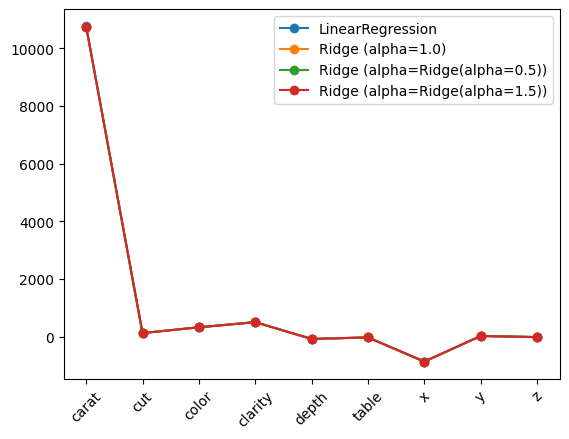

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score

# LinearRegression
print("LinearRegression")

lr_model = LinearRegression().fit(X_train, y_train)
print("Score at the training set: {:.3f}".format(lr_model.score(X_train, y_train)))
print("Score at the test set: {:.3f}".format(lr_model.score(X_test, y_test)))

print()

print("lr_model.coef_: {}".format(lr_model.coef_))
print("lr_model.intercept_: {}".format(lr_model.intercept_))

print()

# Ridge
print("Ridge")
rindge_model = Ridge().fit(X_train, y_train)
print("Score at the training set: {:.3f}".format(rindge_model.score(X_train, y_train)))
print("Score at the test set: {:.3f}".format(rindge_model.score(X_test, y_test)))

print()

alpha_values = [0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0]  # Параметр alpha для Ridge

best_ridge_alpha = None
best_ridge_score = -float('inf')
for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    scores = cross_val_score(ridge_model, X_train, y_train, cv=5)
    if scores.mean() > best_ridge_score:
        best_ridge_score = scores.mean()
        best_ridge_alpha = alpha

print("Найкращий параметр alpha для Ridge", best_ridge_alpha)
print("Найкращий оцінка для Ridge",best_ridge_score)

print()
print("Пошук найкращих параметрів за допомогою крос-валідації")
print()

from sklearn.model_selection import GridSearchCV

ridge_values = {'alpha': [0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0]}  # Параметр alpha для Ridge

# Пошук найкращих параметрів за допомогою крос-валідації
dg_ridge_grid = GridSearchCV(rindge_model, ridge_values, cv=7, n_jobs=-1, verbose=True)
dg_ridge_grid.fit(X_train, y_train)

# Виведення найкращих параметрів та точності моделі
print("Найкращі параметри:", dg_ridge_grid.best_params_)
print("Точність моделі з найкращими параметрами:", dg_ridge_grid.best_score_)

print()
print("Ridge alpha = 0.5")
rindge_model05 = Ridge(alpha = 0.5).fit(X_train, y_train)
print("Score at the training set: {:.3f}".format(rindge_model05.score(X_train, y_train)))
print("Score at the test set: {:.3f}".format(rindge_model05.score(X_test, y_test)))
print()

print()
print("Ridge alpha = 1.0")
rindge_model1 = Ridge(alpha = 1.0).fit(X_train, y_train)
print("Score at the training set: {:.3f}".format(rindge_model1.score(X_train, y_train)))
print("Score at the test set: {:.3f}".format(rindge_model1.score(X_test, y_test)))
print()

print()
print("Ridge alpha = 1.5")
rindge_model15 = Ridge(alpha = 1.5).fit(X_train, y_train)
print("Score at the training set: {:.3f}".format(rindge_model15.score(X_train, y_train)))
print("Score at the test set: {:.3f}".format(rindge_model15.score(X_test, y_test)))
print()

# Візуалізація коефіцієнтів Ridge моделей
fig, ax = plt.subplots()
ax.plot(lr_model.coef_, marker='o', label="LinearRegression")
ridge_model = Ridge(alpha=best_ridge_alpha)
ridge_model.fit(X_train, y_train)
ax.plot(ridge_model.coef_, marker='o', label="Ridge (alpha={})".format(best_ridge_alpha))
ridge_model = Ridge(alpha=best_ridge_alpha)
ridge_model.fit(X_train, y_train)
ridge_model = Ridge(alpha=best_ridge_alpha)
ridge_model.fit(X_train, y_train)
ax.plot(ridge_model.coef_, marker='o', label="Ridge (alpha={})".format(rindge_model05))
ridge_model = Ridge(alpha=best_ridge_alpha)
ridge_model.fit(X_train, y_train)
ax.plot(ridge_model.coef_, marker='o', label="Ridge (alpha={})".format(rindge_model15))
ax.set_xticks(range(len(X_train.columns)))
ax.set_xticklabels(X_train.columns, rotation=45)
ax.legend()
plt.show()

Lasso
Score at the training set: 0.907
Score at the test set: 0.906
Number of features: 7

Найкращий параметр alpha для Lasso 1.0
Найкращий оцінка для Lasso 0.9071736748655935


Lasso alpha = 0.5
Score at the training set: 0.907
Score at the test set: 0.906


Lasso alpha = 1.0
Score at the training set: 0.907
Score at the test set: 0.906


Lasso alpha = 1.5
Score at the training set: 0.907
Score at the test set: 0.906



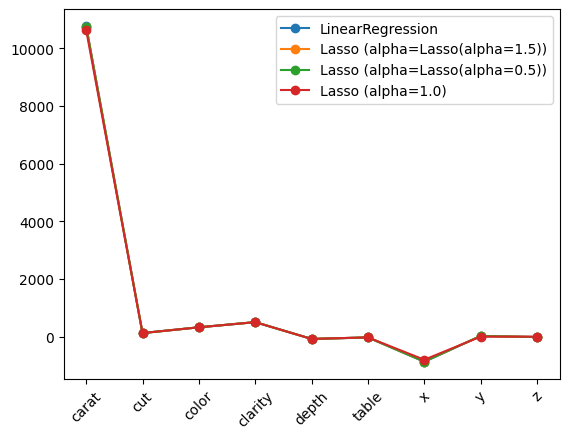

In [3]:
# Lasso

print("Lasso")

ls_model = Lasso().fit(X_train, y_train)
print("Score at the training set: {:.3f}".format(ls_model.score(X_train, y_train)))
print("Score at the test set: {:.3f}".format(ls_model.score(X_test, y_test)))
print("Number of features: {}".format(np.sum(ls_model.coef_ !=0)))
print()

best_lasso_alpha = None
best_lasso_score = -float('inf')
for alpha in alpha_values:
    lasso_model = Lasso(alpha=alpha)
    scores = cross_val_score(lasso_model, X_train, y_train, cv=5)
    if scores.mean() > best_lasso_score:
        best_lasso_score = scores.mean()
        best_lasso_alpha = alpha

print("Найкращий параметр alpha для Lasso", best_lasso_alpha)
print("Найкращий оцінка для Lasso",best_lasso_score)
print()

print()
print("Lasso alpha = 0.5")
ls_model05 = Lasso(alpha = 0.5).fit(X_train, y_train)
print("Score at the training set: {:.3f}".format(ls_model05.score(X_train, y_train)))
print("Score at the test set: {:.3f}".format(ls_model05.score(X_test, y_test)))
print()

print()
print("Lasso alpha = 1.0")
ls_model1 = Lasso(alpha = 1.0).fit(X_train, y_train)
print("Score at the training set: {:.3f}".format(ls_model1.score(X_train, y_train)))
print("Score at the test set: {:.3f}".format(ls_model1.score(X_test, y_test)))
print()

print()
print("Lasso alpha = 1.5")
ls_model15 = Lasso(alpha = 1.5).fit(X_train, y_train)
print("Score at the training set: {:.3f}".format(ls_model15.score(X_train, y_train)))
print("Score at the test set: {:.3f}".format(ls_model15.score(X_test, y_test)))
print()

# Візуалізація Lasso моделей
fig, ax = plt.subplots()
ax.plot(lr_model.coef_, marker='o', label="LinearRegression")
ridge_model = Ridge(alpha=best_ridge_alpha)
ridge_model.fit(X_train, y_train)
ax.plot(ridge_model.coef_, marker='o', label="Lasso (alpha={})".format(ls_model15))
lasso_model = Lasso(alpha=best_lasso_alpha)
lasso_model.fit(X_train, y_train)
ax.plot(ridge_model.coef_, marker='o', label="Lasso (alpha={})".format(ls_model05))
lasso_model = Lasso(alpha=best_lasso_alpha)
lasso_model.fit(X_train, y_train)
ax.plot(lasso_model.coef_, marker='o', label="Lasso (alpha={})".format(best_lasso_alpha))
ax.set_xticks(range(len(X_train.columns)))
ax.set_xticklabels(X_train.columns, rotation=45)
ax.legend()
plt.show()

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Побудова моделей
tree_model = DecisionTreeRegressor().fit(X_train, y_train)
forest_model = RandomForestRegressor().fit(X_train, y_train)
boost_model = GradientBoostingRegressor().fit(X_train, y_train)

print("Decision Tree")
print("Score at the training set: {:.3f}".format(tree_model.score(X_train, y_train)))
print("Score at the test set: {:.3f}".format(tree_model.score(X_test, y_test)))
print()
print("Random Forest")
print("Score at the training set: {:.3f}".format(forest_model.score(X_train, y_train)))
print("Score at the test set: {:.3f}".format(forest_model.score(X_test, y_test)))
print()
print("Gradient Boosting")
print("Score at the training set: {:.3f}".format(boost_model.score(X_train, y_train)))
print("Score at the test set: {:.3f}".format(boost_model.score(X_test, y_test)))

forest_params = { 'max_depth': [1,2,3,4,5], 'n_estimators': [10, 50, 100, 150, 200, 250]}

# Пошук найкращих параметрів за допомогою крос-валідації
dg_forest_grid = GridSearchCV(forest_model, forest_params, cv=5, n_jobs=-1, verbose=True)
dg_forest_grid.fit(X_train, y_train)
print()
print("Найкращий параметр для Random Forest", dg_forest_grid.best_params_)
print("Найкращий оцінка для Random Forest",dg_forest_grid.best_score_)

Decision Tree
Score at the training set: 1.000
Score at the test set: 0.966

Random Forest
Score at the training set: 0.997
Score at the test set: 0.982

Gradient Boosting
Score at the training set: 0.977
Score at the test set: 0.977
Fitting 5 folds for each of 30 candidates, totalling 150 fits

Найкращий параметр для Random Forest {'max_depth': 5, 'n_estimators': 200}
Найкращий оцінка для Random Forest 0.9467091723230533


In [8]:
boost_params = { 'max_depth': [1,2,3,5], 'learning_rate': [0.1,0.5,1,2,5]}

# Пошук найкращих параметрів за допомогою крос-валідації
dg_boost_grid = GridSearchCV(boost_model, boost_params, cv=5, n_jobs=-1, verbose=True)
dg_boost_grid.fit(X_train, y_train)

print("Найкращий параметр для Gradient Boosting", dg_boost_grid.best_params_)
print("Найкращий оцінка для Gradient Boosting",dg_boost_grid.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Найкращий параметр для Gradient Boosting {'learning_rate': 0.1, 'max_depth': 5}
Найкращий оцінка для Gradient Boosting 0.9816866876901156


In [11]:
forest_model_best = RandomForestRegressor(max_depth = 5, n_estimators = 50).fit(X_train, y_train)
boost_model_best = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 5).fit(X_train, y_train)

print("Random Forest")
print("Score at the training set: {:.3f}".format(forest_model_best.score(X_train, y_train)))
print("Score at the test set: {:.3f}".format(forest_model_best.score(X_test, y_test)))
print()
print("Gradient Boosting")
print("Score at the training set: {:.3f}".format(boost_model_best.score(X_train, y_train)))
print("Score at the test set: {:.3f}".format(boost_model_best.score(X_test, y_test)))
print()

print("Featires important:\n{}".format(forest_model_best.feature_importances_))
print()

for name, score in zip(columns, forest_model_best.feature_importances_):
  print(name, score)

Random Forest
Score at the training set: 0.946
Score at the test set: 0.946
Gradient Boosting
Score at the training set: 0.986
Score at the test set: 0.982

Featires important:
[6.48724612e-01 0.00000000e+00 2.01485776e-02 5.55233269e-02
 0.00000000e+00 0.00000000e+00 1.45361951e-03 2.73782855e-01
 3.67009176e-04]

carat 0.6487246120565571
cut 0.0
color 0.020148577632606707
clarity 0.05552332694912817
depth 0.0
table 0.0
x 0.0014536195123473444
y 0.2737828546732522
z 0.00036700917610851125


In [15]:
# Дослідження впливу глибини дерева
max_depth_values = [3, 5, 7, 10]
best_rf_depth = None
best_rf_score = -float('inf')
for depth in max_depth_values:
    rf_model = RandomForestRegressor(max_depth=depth)
    rf_model.fit(X_train, y_train)
    score = rf_model.score(X_test, y_test)
    if score > best_rf_score:
        best_rf_score = score
        best_rf_depth = depth

print("Найкращий оцінка для Random Forest", best_rf_score)

# Дослідження впливу глибини дерева
max_depth_values = [3, 5, 7, 10]
best_boos_depth = None
best_boos_score = -float('inf')
for depth in max_depth_values:
    boos_model = GradientBoostingRegressor(max_depth=depth)
    boos_model.fit(X_train, y_train)
    score = boos_model.score(X_test, y_test)
    if score > best_boos_score:
        best_boos_score = score
        best_boos_depth = depth

print("Найкращий оцінка для Gradient Boosting", best_boos_score)

Найкращий оцінка для Random Forest 0.9800234431906166
Найкращий оцінка для Gradient Boosting 0.9829067796521958


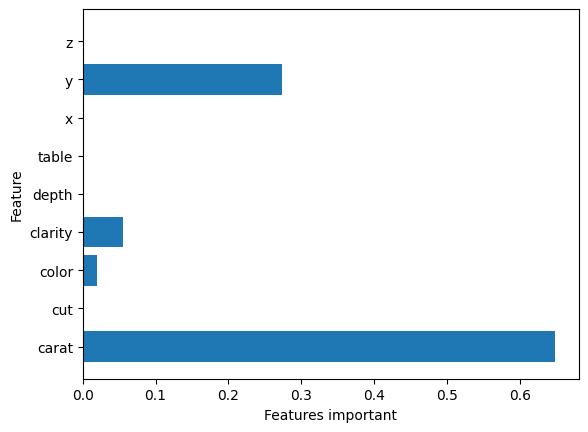

In [16]:
def plot_feature_importances_cancer(model):
  n_features = shape
  plt.barh(range(n_features), model.feature_importances_, align = 'center')
  plt.yticks(np.arange(n_features), columns)
  plt.xlabel("Features important")
  plt.ylabel("Feature")

plot_feature_importances_cancer(forest_model_best)